<a href="https://colab.research.google.com/github/fimoziq/unecozik/blob/main/2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv
df = read_csv('_pythza2F.csv',parse_dates = True, index_col = 0,delimiter=',',decimal=',')
df.head()

,pr
d;,
2007-01-01,4.20
2007-02-01,3.93
2007-03-01,3.64
2007-04-01,3.53
2007-05-01,3.69


"""тренд-сезонная модель"""


In [2]:
df_columns, df.columns = df.columns, ('y', )
df_index, df.index.name = df.index.name, 'date'
df.head()

,y
date,
2007-01-01,4.20
2007-02-01,3.93
2007-03-01,3.64
2007-04-01,3.53
2007-05-01,3.69


"""float64!!!!!!!!!!!! delimiter=',' ^ decimal=','"""


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 6))

plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')
    
plt.show()

In [6]:
import numpy as np
df['t'] = np.arange(1, len(df) + 1)
df.head()

,y,t
date,,
2007-01-01,4.20,1
2007-02-01,3.93,2
2007-03-01,3.64,3
2007-04-01,3.53,4
2007-05-01,3.69,5


In [7]:
import numpy as np
coef = np.polyfit(df['t'], df['y'], deg = 1)
coef

array([0.0066815 , 4.07421986])

In [9]:
df['y^'] = coef[0] * df['t'] + coef[1]
df['y^'].head()

date
2007-01-01    4.080901
2007-02-01    4.087583
2007-03-01    4.094264
2007-04-01    4.100946
2007-05-01    4.107627
Name: y^, dtype: float64

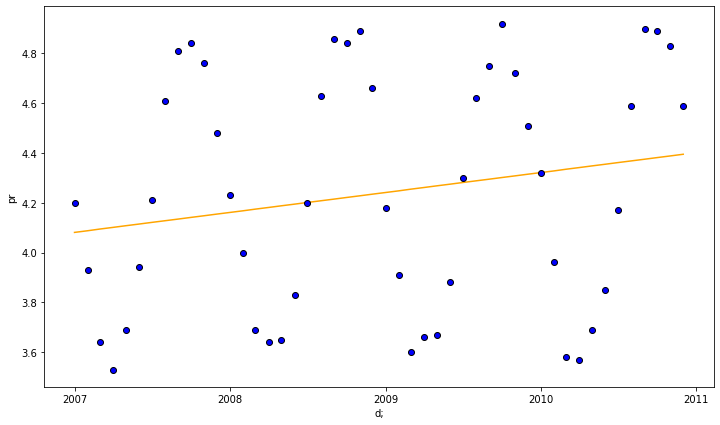

In [10]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.plot(df['y^'], color = 'orange')

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()

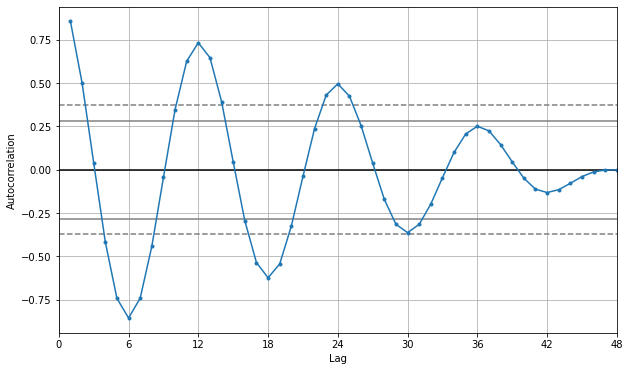

In [11]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize = (10, 6))

autocorrelation_plot(df['y'], ax = ax, marker = '.')
ax.xaxis.set_major_locator(plt.MultipleLocator(6))
ax.set_xlim(0, 48)

plt.show()

"""по графику автокорреляции для ряда данных можно предположить, что лаг **сезонности** равен 12"""


In [12]:
import pandas as pd
s = 12
ses = (df['y']-df['y^'])
ses = np.array([np.mean(ses.iloc[k::s]) for k in range(s)])
ses = pd.DataFrame(ses - np.mean(ses), index = np.arange(1, s + 1))
ses

,0
1,0.031332
2,-0.257850
3,-0.587031
4,-0.621213
5,-0.552894
6,-0.359576
7,-0.021257
8,0.364561
9,0.575380
10,0.611198


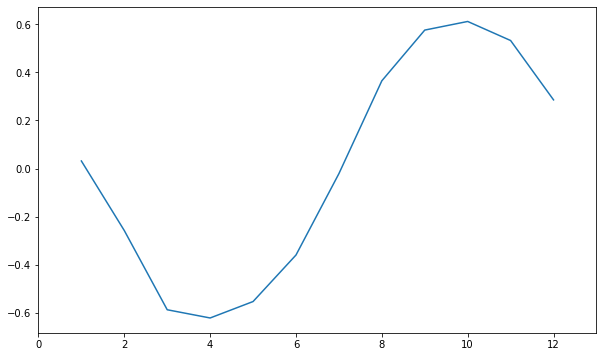

In [13]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_xlim(0, s + 1)
plt.plot(ses)
plt.show()

In [14]:
tmp = pd.concat([ses for _ in range(4)], ignore_index = True)
tmp.index = df.index

In [15]:
df['s'] = tmp
df['y^s'] = df['y^'] + df['s']


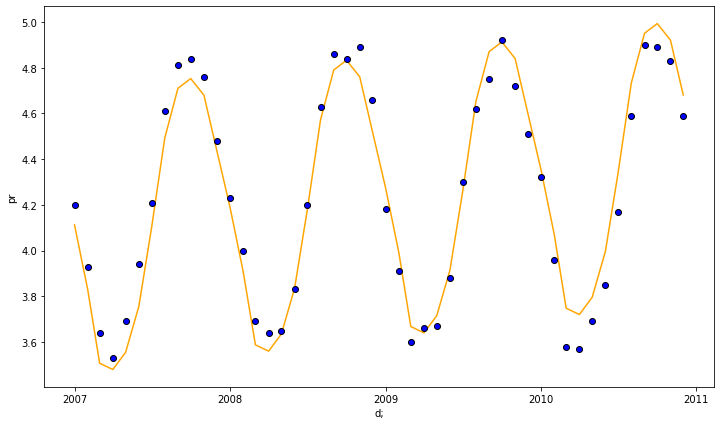

In [16]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.plot(df['y^s'], color = 'orange')

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()

In [17]:
n = len(df)

x = np.arange(48, 60)

df_fv = pd.DataFrame({'y' : coef[0] * x + coef[1] + df['s'].iloc[:12].array}, index = pd.date_range(start = df.index[-1] + np.timedelta64(1, 'M'), 
                                    end   = df.index[-1] + np.timedelta64(13, 'M'), 
                                    freq  = 'MS'))

"""точечный и интервальный прогноз>"""


In [18]:
variance = np.sum(np.power(df['y'] - df['y^s'], 2)) / (n-1)
sigma =np.power(variance,0.5)
sigma

0.09807964224129358

In [19]:
from scipy.stats import t
tstud=t.interval(0.95, len(df)-1)
list(tstud)

[-2.0117405104757546, 2.0117405104757546]

In [20]:
lower=list(tstud)[0]*sigma
lower

-0.19731078954977932

In [22]:
upper=list(tstud)[1]*sigma
upper


0.19731078954977932

In [23]:
df_fv['y-'] = df_fv['y'] + lower
df_fv['y+'] = df_fv['y'] + upper

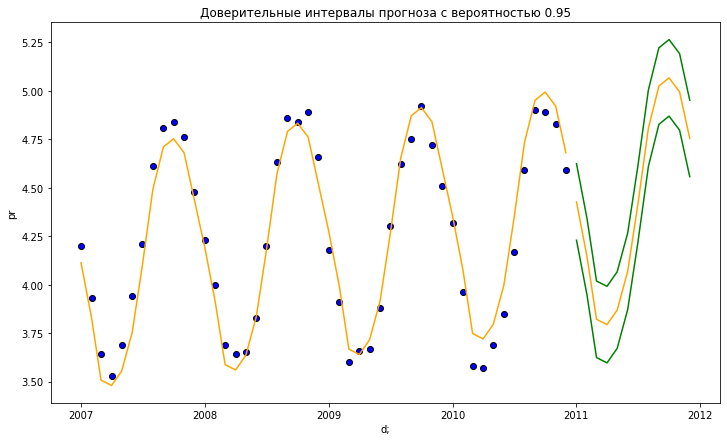

In [24]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.title('Доверительные интервалы прогноза с вероятностью 0.95')
plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.plot(df_fv['y-'], color = 'green')
ax.plot(df_fv['y'],  color = 'orange')
ax.plot(df_fv['y+'], color = 'green')

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')
ax.plot(df['y^s'], color = 'orange')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()

In [25]:
1 - np.sum(np.power(df['y'] - df['y^s'], 2)) / np.sum(np.power(df['y'] - np.mean(df['y']), 2))


0.9573670610356475

"""коэф. детерминации """


дарбин уотсон

In [40]:
e=df['s']

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       48 non-null     float64
 1   t       48 non-null     int64  
 2   y^      48 non-null     float64
 3   s       48 non-null     float64
 4   y^s     48 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.2 KB


In [83]:
e2=np.multiply(e,e)
e2

date
2007-01-01    0.000982
2007-02-01    0.066487
2007-03-01    0.344606
2007-04-01    0.385905
2007-05-01    0.305692
2007-06-01    0.129295
2007-07-01    0.000452
2007-08-01    0.132905
2007-09-01    0.331062
2007-10-01    0.373563
2007-11-01    0.283042
2007-12-01    0.081416
2008-01-01    0.000982
2008-02-01    0.066487
2008-03-01    0.344606
2008-04-01    0.385905
2008-05-01    0.305692
2008-06-01    0.129295
2008-07-01    0.000452
2008-08-01    0.132905
2008-09-01    0.331062
2008-10-01    0.373563
2008-11-01    0.283042
2008-12-01    0.081416
2009-01-01    0.000982
2009-02-01    0.066487
2009-03-01    0.344606
2009-04-01    0.385905
2009-05-01    0.305692
2009-06-01    0.129295
2009-07-01    0.000452
2009-08-01    0.132905
2009-09-01    0.331062
2009-10-01    0.373563
2009-11-01    0.283042
2009-12-01    0.081416
2010-01-01    0.000982
2010-02-01    0.066487
2010-03-01    0.344606
2010-04-01    0.385905
2010-05-01    0.305692
2010-06-01    0.129295
2010-07-01    0.000452
2010-0

In [98]:
e2sum=sum(e2)
e2sum

9.741623232231143

In [92]:
e2square = []
for i in range(1,len(e2)):
    x = (e2[i] - e2[i-1])**2
    e2square.append(x)

In [93]:
e2square

[0.004290892585033088,
 0.07735034523119011,
 0.0017056574619962988,
 0.006434165218192279,
 0.03111604026848085,
 0.01660050864404139,
 0.017543771527735355,
 0.03926614797254567,
 0.0018063714505922315,
 0.0081941335158859,
 0.04065285484039333,
 0.0064696980679828184,
 0.004290892585033088,
 0.07735034523119011,
 0.0017056574619962988,
 0.006434165218192279,
 0.03111604026848085,
 0.01660050864404139,
 0.017543771527735355,
 0.03926614797254567,
 0.0018063714505922315,
 0.0081941335158859,
 0.04065285484039333,
 0.0064696980679828184,
 0.004290892585033088,
 0.07735034523119011,
 0.0017056574619962988,
 0.006434165218192279,
 0.03111604026848085,
 0.01660050864404139,
 0.017543771527735355,
 0.03926614797254567,
 0.0018063714505922315,
 0.0081941335158859,
 0.04065285484039333,
 0.0064696980679828184,
 0.004290892585033088,
 0.07735034523119011,
 0.0017056574619962988,
 0.006434165218192279,
 0.03111604026848085,
 0.01660050864404139,
 0.017543771527735355,
 0.03926614797254567,
 0.

In [95]:
e2squaresum=sum(e2square)
e2squaresum

0.9992526490682946

In [100]:
re=e2squaresum/e2sum
re

0.10257557957714546

In [101]:
DW=2*(1-re)
DW

1.794848840845709